In [13]:
from ultralytics import YOLO
from PIL import Image

# model = YOLO("../../model/yolo11x.pt")  # load a custom model
model = YOLO("../../model/yolov8s-world.pt")  # load a custom model
# image_path = "/home/fyp/Pictures/TestSeg/office1.jpg"
image_path="/home/fyp/Pictures/TestSeg/bottle_tape.jpg"

In [14]:
results = model(image_path)  # predict on an image

# Access the results
for result in results:
    xywh = result.boxes.xywh  # center-x, center-y, width, height
    xywhn = result.boxes.xywhn  # normalized
    xyxy = result.boxes.xyxy  # top-left-x, top-left-y, bottom-right-x, bottom-right-y
    xyxyn = result.boxes.xyxyn  # normalized
    names = [result.names[cls.item()] for cls in result.boxes.cls.int()]  # class name of each box
    confs = result.boxes.conf  # confidence score of each box
    print(1)
print(type(results))
print(len(results))


image 1/1 /home/fyp/Pictures/TestSeg/bottle_tape.jpg: 480x640 1 bottle, 1 laptop, 1 remote, 1 keyboard, 1 cell phone, 1 book, 4.3ms
Speed: 1.1ms preprocess, 4.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
1
<class 'list'>
1


In [15]:
print(names)
print(xywh)

['bottle', 'laptop', 'keyboard', 'cell phone', 'book', 'remote']
tensor([[ 494.7265,  341.0061,  504.1202,  681.5263],
        [1642.4330,  317.1113,  119.1340,  390.7821],
        [1514.1726,  687.9051,  375.6547, 1176.1898],
        [1261.9666,  435.9475,  495.8528,  169.1261],
        [1162.3090,  268.1586,  665.3929,  319.8375],
        [1261.1587,  432.9863,  495.8256,  174.3298]], device='cuda:0')


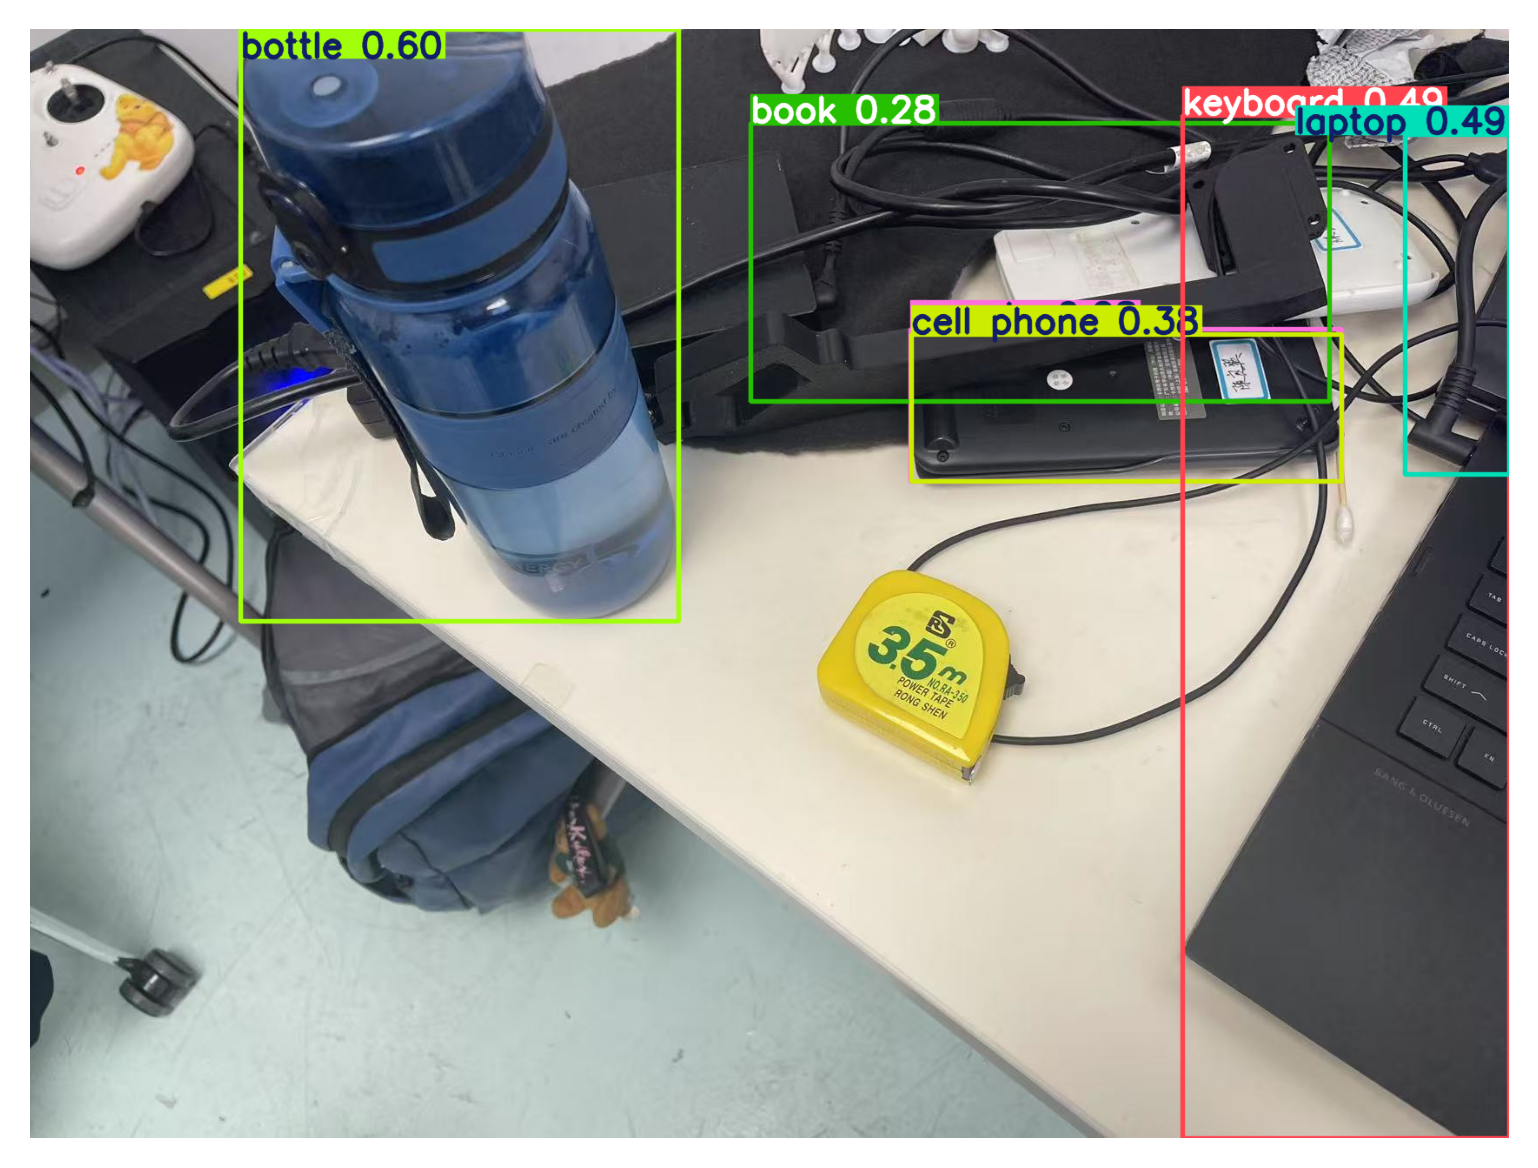

Image width: 1702, Image height: 1276


In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Draw the results on the image
annotated_image = results[0].plot()

# Convert the image to a format suitable for Matplotlib
annotated_image = Image.fromarray(annotated_image[..., ::-1])

# Display the image in the Jupyter Notebook
plt.rcParams['figure.dpi'] = 300
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
# Print the size of the annotated image
width, height = annotated_image.size
print(f"Image width: {width}, Image height: {height}")


In [5]:
xywh

tensor([[1169.9774, 2018.0146,  490.1202,  676.6168],
        [2117.9683, 1021.9503, 2246.8682, 1098.0596]], device='cuda:0')

In [6]:
xywh.cpu().detach().numpy().tolist()

[[1169.9774169921875, 2018.0146484375, 490.12017822265625, 676.6168212890625],
 [2117.96826171875, 1021.9503173828125, 2246.8681640625, 1098.0595703125]]